In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


# MNIST Hand Writing Digit

## Listing 2.1 Loading the MNIST dataset in Keras

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[0]

5

In [6]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
test_labels[0]

7

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images.ndim

3

In [10]:
train_images[0].ndim

2

In [11]:
train_images[0].shape

(28, 28)

## Listing 2.2 The Network Architecture

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

## Listing 2.3 The Compilation Step

In [13]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Listing 2.4 Preparing the image Data

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Listing 2.5 Preparing the labels

In [15]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 20ms/step - loss: 0.2563 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.1026 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0680 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0375 - accuracy: 0.9885


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ',test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0665 - accuracy: 0.9800
test_acc:  0.9800000190734863


## Listing 2.6 Displaying the image

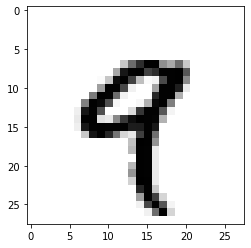

In [19]:
(train_images2, train_labels2), (test_images2, test_labels2) = mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(train_images2[4], cmap=plt.cm.binary)
plt.show()

In [20]:
train_labels2[4]

9

# MNIST FASHION

In [21]:
mnist = tf.keras.datasets.fashion_mnist
#Fetch Data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [22]:
# NOrmalize Data
training_images = training_images / 255.0
test_images = test_images /255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(training_images, training_labels, epochs=6, batch_size=128)

Epoch 1/6
469/469 [==============================] - 7s 16ms/step - loss: 0.5023 - accuracy: 0.8242
Epoch 2/6
469/469 [==============================] - 7s 14ms/step - loss: 0.3763 - accuracy: 0.8647
Epoch 3/6
469/469 [==============================] - 7s 15ms/step - loss: 0.3362 - accuracy: 0.8782
Epoch 4/6
469/469 [==============================] - 7s 16ms/step - loss: 0.3059 - accuracy: 0.8895
Epoch 5/6
469/469 [==============================] - 6s 14ms/step - loss: 0.2903 - accuracy: 0.8927
Epoch 6/6
469/469 [==============================] - 6s 14ms/step - loss: 0.2722 - accuracy: 0.9002


In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3450 - accuracy: 0.8749


[0.3450309634208679, 0.8748999834060669]

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('dataset/weight-height.csv')

In [28]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [29]:
X = df[['Height']]
y_true = df[['Weight']]

In [30]:
def line(x,w=0,b=0):
    return w * x + b #Like a line

def mean_squared_error(y_true,y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

In [31]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'b')

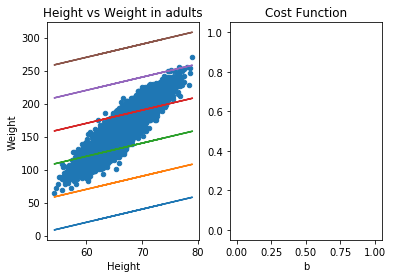

In [32]:
ax1=plt.subplot(121)
df.plot(kind='scatter', x='Height', y='Weight', title='Height vs Weight in adults', ax=ax1)

bs = np.array([-100,-50,0,50,100,150])
mses = []
for b in bs:
    y_pred = line(X,w=2,b=b)
    mse = mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
        
ax2 = plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title("Cost Function")
plt.xlabel("b")

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD


print(X[:2])
print(y_pred[:2])

X.shape

      Height
0  73.847017
1  68.781904
       Height
0  297.694034
1  287.563808


(10000, 1)

In [34]:
model = Sequential()

#model Structure
model.add(Dense(1, input_shape=(1,)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(Adam(lr=0.8), "mean_squared_error")
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 3ms/step - loss: 748.6809
Epoch 2/40
313/313 [==============================] - 1s 3ms/step - loss: 559.4362
Epoch 3/40
313/313 [==============================] - 1s 3ms/step - loss: 499.6140
Epoch 4/40
313/313 [==============================] - 1s 3ms/step - loss: 452.1688
Epoch 5/40
313/313 [==============================] - 1s 3ms/step - loss: 418.0332
Epoch 6/40
313/313 [==============================] - 1s 3ms/step - loss: 368.6106
Epoch 7/40
313/313 [==============================] - 1s 3ms/step - loss: 322.1136
Epoch 8/40
313/313 [==============================] - 1s 3ms/step - loss: 320.7269
Epoch 9/40
313/313 [==============================] - 1s 3ms/step - loss: 267.1001
Epoch 10/40
313/313 [==============================] - 1s 3ms/step - loss: 262.3651
Epoch 11/40
313/313 [==============================] - 1s 3ms/step - loss: 241.3248
Epoch 12/40
313/313 [==============================] - 1s 3ms/step - loss: 221.6438
E

In [36]:
y_pred = model.predict(X)
y_pred

array([[217.25635],
       [178.43182],
       [219.27295],
       ...,
       [140.76627],
       [180.36603],
       [126.02057]], dtype=float32)

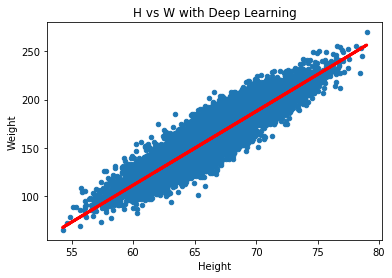

In [37]:
df.plot(kind="scatter", x="Height", y="Weight", title="H vs W with Deep Learning")
plt.plot(X, y_pred, color='red', linewidth=3)